In [5]:
frames_pkl = r"D:\DPythonProjects\yt_summarizer\data\ixfwsm_frame_text_data\frames.pkl"
frame_text_data_pkl = (
    r"D:\DPythonProjects\yt_summarizer\data\ixfwsm_frame_text_data\frame_text_data.pkl"
)

In [16]:
import pandas as pd
import numpy as np


class DataFrameLoader:
    def __init__(self, filepath):
        self.filepath = filepath

    def load_array(self):
        # Load the NumPy array from the file path
        array = np.load(self.filepath, allow_pickle=True)
        # I want numpy array
        array = np.array(array)
        return array

    def create_dataframe(self, array):
        # Create a DataFrame from the NumPy array
        df = pd.DataFrame(array)
        return df

    def print_dataframe(self, df):
        # Print the DataFrame
        print(df)


# Create an instance of the DataFrameLoader class
loader = DataFrameLoader(frame_text_data_pkl)

# Load the array
array = loader.load_array()
type(array)

numpy.ndarray

In [18]:
print(array.shape)
array[:5]

(1061, 2)


array([['0',
        '= ChatGPT ~ g\nMost popular programming\nlanguage for enterprise(big)\napplications? Show some graph for\nother popular languages also\ne J\n. at > a\nah\nvt\n7 7\nvt ¥ i;\ni f\n——\n© ; SS\n'],
       ['1',
        '= ChatGPT v G\nMost popular programming\nlanguage for enterprise(big)\napplications? Show some graph for\nother popular languages also\nS A y\ni at\nay\ni r) .\nr! f \\\n'],
       ['2',
        "= ChatGPT v G\nMost popular programming\nlanguage for enterprise(big)\napplications? Show some graph for\nother popular languages also\n© j ; j =)\n) =\n7 at 4\nay\ni (\\\\ \\j\nm ff .\n' N qj\n"],
       ['3',
        '= ChatGPT Gq\nfee eect\nlanguage for enterprise(big)\napplications? Show some graph for\ncihoapenttmersoci\n® : " 3 y\n5 R\\\\ KX\nMy :\ny ) v\n. ‘a %\n“PANS\n'],
       ['4',
        '= ChatGPT ~ G\nMost popular programming\nlanguage for enterprise(big)\napplications? Show some graph for\nother popular languages also\n6 :\nat\n‘ae\nhs) . MA\n>

In [19]:
# Create the DataFrame
df = loader.create_dataframe(array)

# Print the DataFrame
loader.print_dataframe(df)

         0                                                  1
0        0  = ChatGPT ~ g\nMost popular programming\nlangu...
1        1  = ChatGPT v G\nMost popular programming\nlangu...
2        2  = ChatGPT v G\nMost popular programming\nlangu...
3        3  = ChatGPT Gq\nfee eect\nlanguage for enterpris...
4        4  = ChatGPT ~ G\nMost popular programming\nlangu...
...    ...                                                ...
1056  1056  CRASH COURSE\n+\nTop 200 INTERVIEW QUESTIONS\n...
1057  1057  CRASH COURSE\n+\nTop 200 INTERVIEW QUESTIONS\n...
1058  1058  CRASH COURSE\n+\nTop 200 INTERVIEW QUESTIONS\n...
1059  1059  CRASH COURSE\nTop 200 teenie QUESTIONS\nJA PDF...
1060  1060  CRASH COURSE\n+\nTop 200 INTERVIEW QUESTIONS\n...

[1061 rows x 2 columns]


In [21]:
frames_loader = DataFrameLoader(frames_pkl)
frames_array = frames_loader.load_array()
print(frames_array.shape)

(1061, 360, 640, 3)


In [22]:
df.shape

(1061, 2)

In [23]:
df.rename(columns={0: "frame_id", 1: "text"}, inplace=True)

In [24]:
df.head()

frame_id                                               text
0        0  = ChatGPT ~ g\nMost popular programming\nlangu...
1        1  = ChatGPT v G\nMost popular programming\nlangu...
2        2  = ChatGPT v G\nMost popular programming\nlangu...
3        3  = ChatGPT Gq\nfee eect\nlanguage for enterpris...
4        4  = ChatGPT ~ G\nMost popular programming\nlangu...

In [25]:
df.iloc[0]["text"]
# '= ChatGPT ~ g\nMost popular programming\nlanguage for enterprise(big)\napplications? Show some graph for\nother popular languages also\ne J\n. at > a\nah\nvt\n7 7\nvt ¥ i;\ni f\n——\n© ; SS\n'

# I want to clean the text data

'= ChatGPT ~ g\nMost popular programming\nlanguage for enterprise(big)\napplications? Show some graph for\nother popular languages also\ne J\n. at > a\nah\nvt\n7 7\nvt ¥ i;\ni f\n——\n© ; SS\n'

In [26]:
import re


def clean_text(text):
    # Remove special characters and numbers
    text = re.sub(r"[^a-zA-Z\s]", "", text)

    # Remove extra whitespace
    text = " ".join(text.split())

    # Convert to lowercase
    text = text.lower()

    return text

In [29]:
def char_count(text):
    return len(text)

In [33]:
# Clean the text
original_text = df.iloc[0]["text"]
cleaned_text = clean_text("sdf df")
chars = char_count(cleaned_text)

In [34]:
df["cleaned_text"] = df["text"].apply(clean_text)
df["char_count"] = df["cleaned_text"].apply(char_count)

In [35]:
df.head()

frame_id                                               text  \
0        0  = ChatGPT ~ g\nMost popular programming\nlangu...   
1        1  = ChatGPT v G\nMost popular programming\nlangu...   
2        2  = ChatGPT v G\nMost popular programming\nlangu...   
3        3  = ChatGPT Gq\nfee eect\nlanguage for enterpris...   
4        4  = ChatGPT ~ G\nMost popular programming\nlangu...   

                                        cleaned_text  char_count  
0  chatgpt g most popular programming language fo...         150  
1  chatgpt v g most popular programming language ...         147  
2  chatgpt v g most popular programming language ...         149  
3  chatgpt gq fee eect language for enterprisebig...         118  
4  chatgpt g most popular programming language fo...         140

In [36]:
import matplotlib.pyplot as plt

In [ ]:
from typing import *

In [119]:
class DataVisualizer:
    def __init__(self, df: pd.DataFrame):
        self.df = df

        weight_y = 10
        weight_x = 7
        max_chars = df["char_count"].max() / 4

        # plt.figure(figsize=( df.shape[0]  / weight_x, max_chars /weight_y))
        self.figsize = (df.shape[0] / weight_x, max_chars / weight_y)

    @staticmethod
    def plot_decorator(func):
        def wrapper(*args, **kwargs):
            # set style to normal style
            plt.style.use("classic")
            plt.figure(figsize=args[0].figsize)
            func(*args, **kwargs)
            # plt.grid(True, axis="both", linestyle="--", alpha=0.7)
            # color should be light of the grid
            plt.grid(True, axis="both", linestyle="--", alpha=0.7, color="lightgrey")
            plt.xticks(args[0].df["frame_id"], rotation=45, ha="right")

            plt.show()

        return wrapper

    @plot_decorator
    def plot_char_count(self):
        # Plot a histogram of the character count
        plt.hist(self.df["char_count"], bins=30, color="skyblue", edgecolor="black")
        plt.title("Character Count in Text")
        plt.xlabel("Character Count")
        plt.ylabel("Frequency")

    @plot_decorator
    def plot_frame_id_vs_char_count(self):
        # Plot the frame_id vs char_count
        plt.scatter(self.df["frame_id"], self.df["char_count"], color="skyblue")
        plt.title("Frame ID vs Character Count")
        plt.xlabel("Frame ID")
        plt.ylabel("Character Count")

    @plot_decorator
    def plot_frame_id_vs_char_count_line(self):
        # Plot the frame_id vs char_count with a line connecting the points
        plt.plot(self.df["frame_id"], self.df["char_count"], color="blue")
        plt.title("Frame ID vs Character Count")
        plt.xlabel("Frame ID")
        plt.ylabel("Character Count")
    
    @plot_decorator
    def plot_moving_averages(self):
        df = self.df
        plt.plot(df["frame_id"], df["char_count"], color="skyblue", label="Character Count")
        plt.plot(df["frame_id"], df["SMA_short"], color="orange", label="Short Moving Average")
        plt.plot(df["frame_id"], df["SMA_long"], color="red", label="Long Moving Average")
        plt.title("Moving Averages")
        plt.xlabel("Frame ID")
        plt.ylabel("Character Count")
        plt.legend()
    
    @plot_decorator
    def plot_crossover_points(self, crossover_points):
        df = self.df
        self.plot_moving_averages()
        plt.scatter(crossover_points["frame_id"], crossover_points["char_count"], color="black", label="Crossover Points")
        plt.title("Crossover Points")
        plt.xlabel("Frame ID")
        plt.ylabel("Character Count")
        plt.legend()  


In [120]:
dv = DataVisualizer(df)

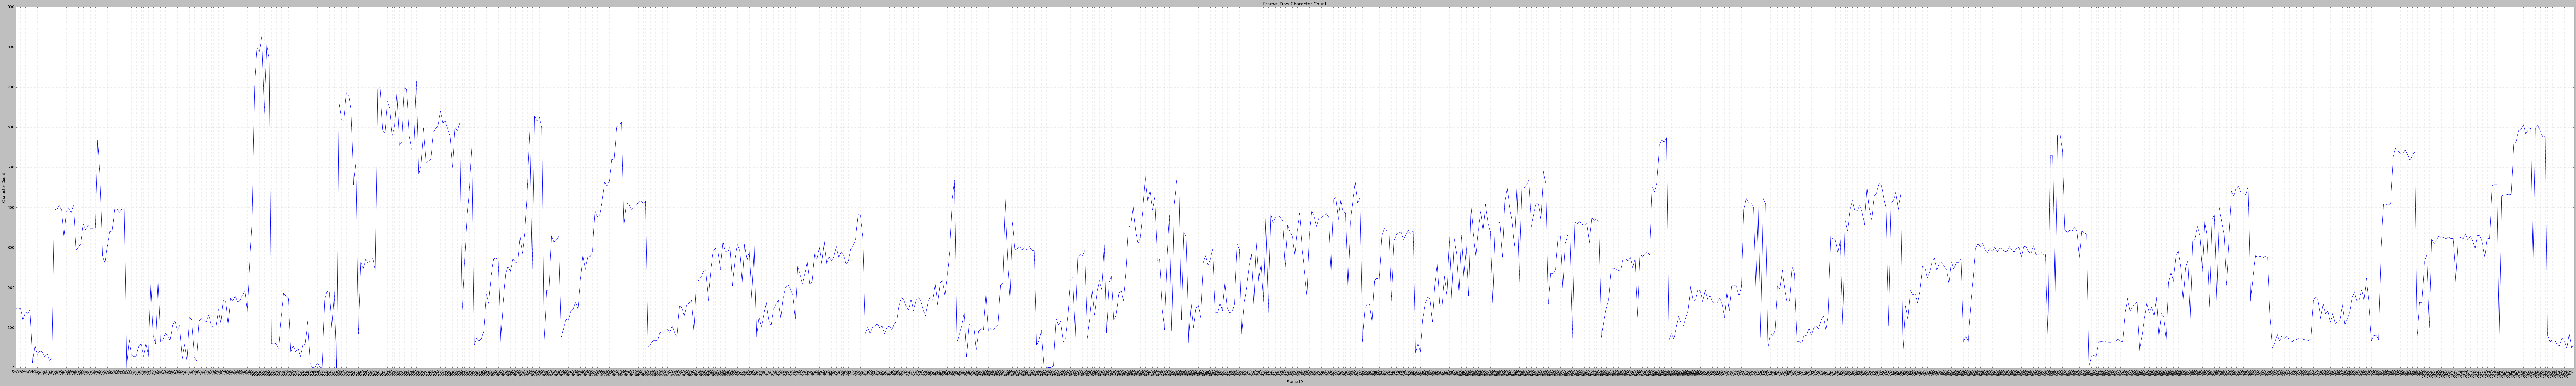

In [110]:
dv.plot_frame_id_vs_char_count_line()

In [100]:
# dv.plot_char_count()

In [96]:
# dv.plot_frame_id_vs_char_count()

In [114]:
class Analyzer:
    def __init__(self, df: pd.DataFrame):
        self.df = df
    def calculate_moving_averages(self, short_window=20, long_window=50):
        self.df['SMA_short'] = self.df['char_count'].rolling(window=short_window).mean()
        self.df['SMA_long'] = self.df['char_count'].rolling(window=long_window).mean()
        self.df['crossover'] = np.where(self.df['SMA_short'] > self.df['SMA_long'], 1, 0)
        self.df['crossover_change'] = self.df['crossover'].diff()
        return df

    def crossover_points(self):
        # Find the crossover points
        crossover_points = self.df[self.df["crossover_change"] != 0]
        return crossover_points

analyser = Analyzer(df)
df_with_ma = analyser.calculate_moving_averages()

crossover_points = analyser.crossover_points()


In [127]:
crossover_points.head()

frame_id                                               text  \
0          0  = ChatGPT ~ g\nMost popular programming\nlangu...   
49        49        0. Whats ova? @\n*> (High-level language)\n   
54        54  Bytecode {Intermediate language)\nNative code ...   
91        91  Q. What are JDK, JRE & JVM? How a Java program...   
122      122                                 ras\noy\nee\nQQ,\n   

                                          cleaned_text  char_count  SMA_short  \
0    chatgpt g most popular programming language fo...         150        NaN   
49                        whats ova highlevel language          28     303.90   
54   bytecode intermediate language native code low...          63     217.25   
91   q what are jdk jre jvm how a java program comp...         179     121.15   
122                                       ras oy ee qq          12     178.45   

     SMA_long  crossover  crossover_change  
0         NaN          0               NaN  
49     249.28          1               1.0  
54     239.94          0              -1.0  
91     117.64          1               1.0  
122    209.36          0              -1.0

In [121]:
dv2 = DataVisualizer(df_with_ma)


<Figure size 12125.7x1656 with 0 Axes>

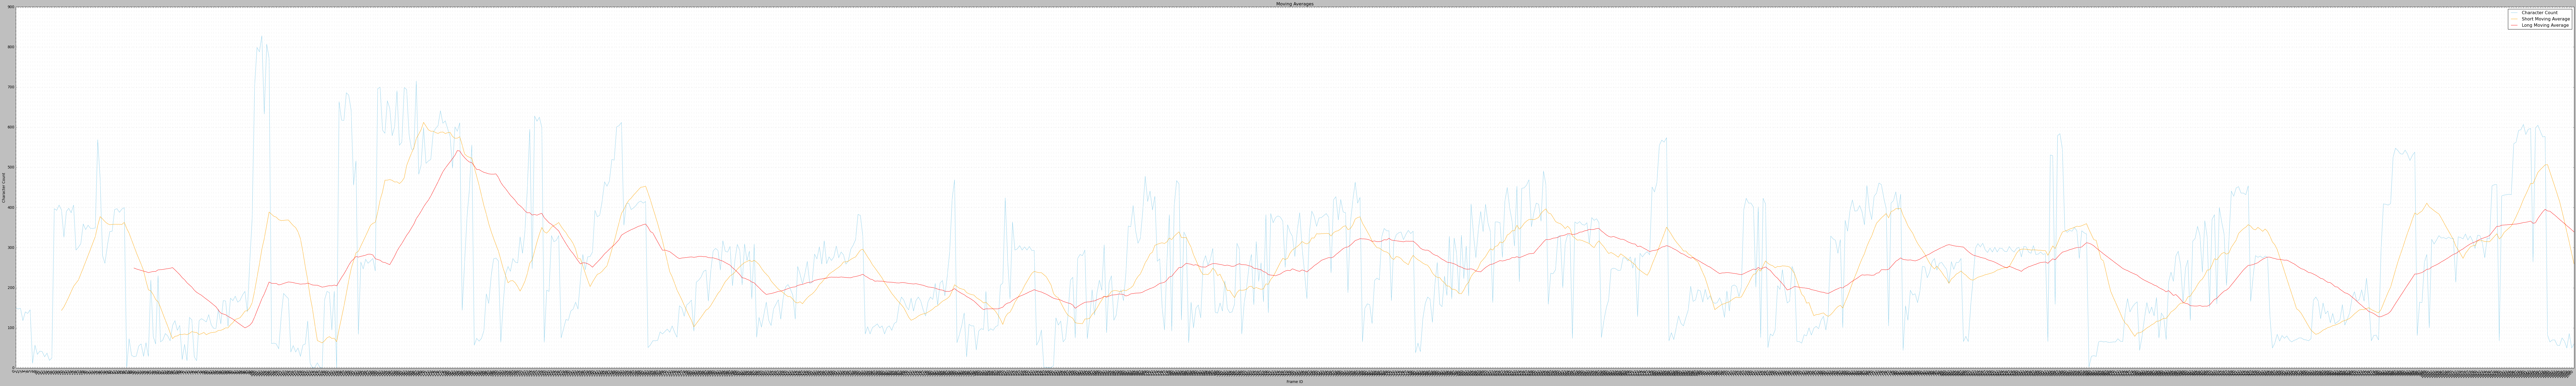

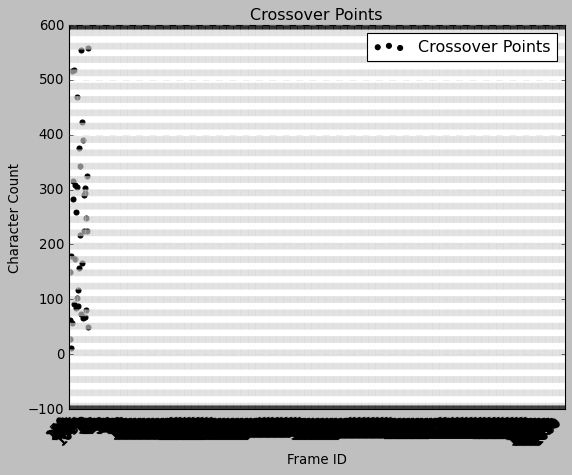

In [124]:
dv2.plot_crossover_points(crossover_points)

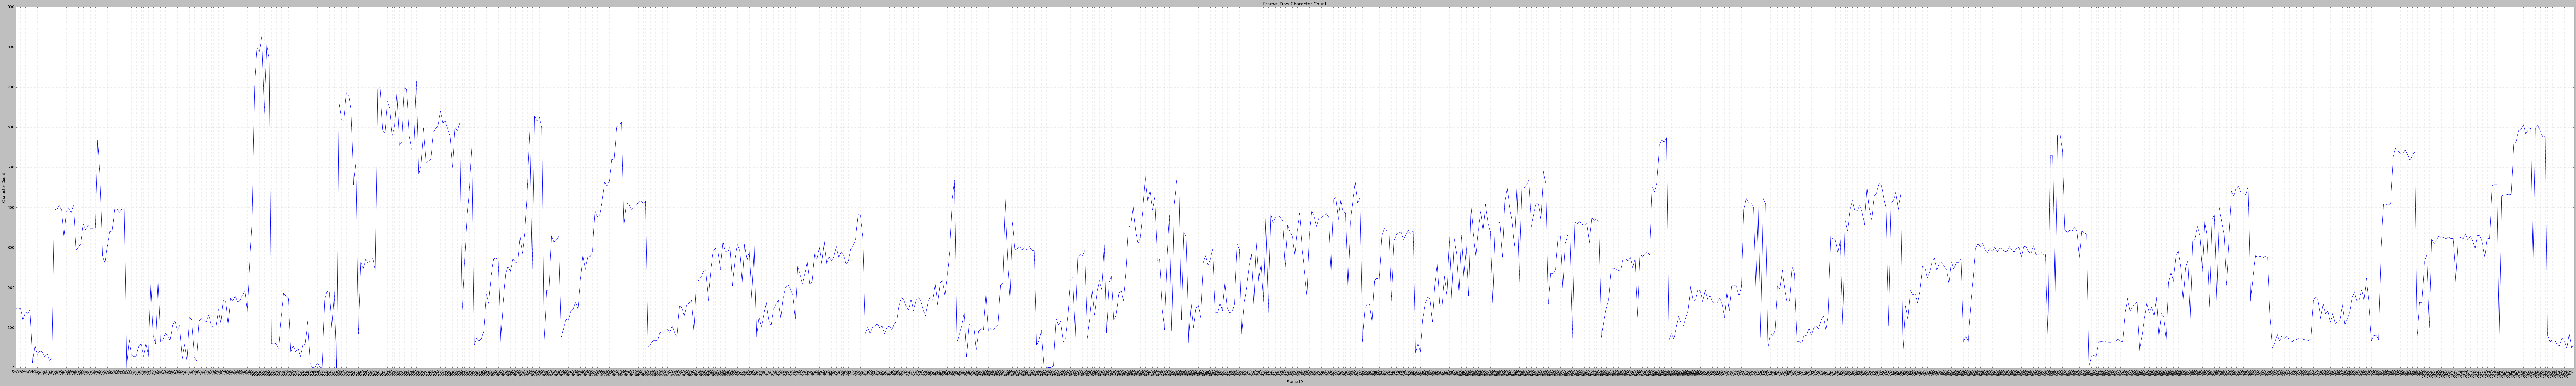

In [122]:

dv2.plot_frame_id_vs_char_count_line()